In [190]:
# import the libraries pandas
import pandas

In [191]:
# do data cleaning
data = pandas.read_csv('datasets/OnlineRetail.csv', parse_dates=['InvoiceDate'], infer_datetime_format=True)
data

/tmp/ipykernel_5576/3028041573.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data = pandas.read_csv('datasets/OnlineRetail.csv', parse_dates=['InvoiceDate'], infer_datetime_format=True)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [192]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [193]:
# drop null rows in column CustomerID
data.dropna(axis=0,subset=['CustomerID'],inplace=True)
# change InvoiceNo and CustomerID to str
data['InvoiceNo'] = data['InvoiceNo'].astype('str')
data['CustomerID'] = data['CustomerID'].astype('str')
# drop null rows in Description column
data.dropna(axis=0,subset=['Description'],inplace=True)
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [194]:
# calculate the aggregation metric(sum, mean, product) indicating how many orders were placed by each customer
import numpy
n_orders = data.groupby('CustomerID')['InvoiceNo'].nunique()
n_orders

CustomerID
12346.0     2
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     3
18283.0    16
18287.0     3
Name: InvoiceNo, Length: 4372, dtype: int64

In [195]:
# find the % of customers who ordered more than once
mult_orders_perc = numpy.sum(n_orders > 1) / data['CustomerID'].nunique()
mult_orders_perc
# this calculates the % of customers with multiple orders by dividing the number of customers with multiple orders by the total number of customers. nunique() calculates the total number of unique customer ID in the dataframe/dataset
print(f"{100*mult_orders_perc:.2f}% of customers ordered more than once")
# from this analysis we can see that customers have a behaviour of ordering more than once

69.97% of customers ordered more than once


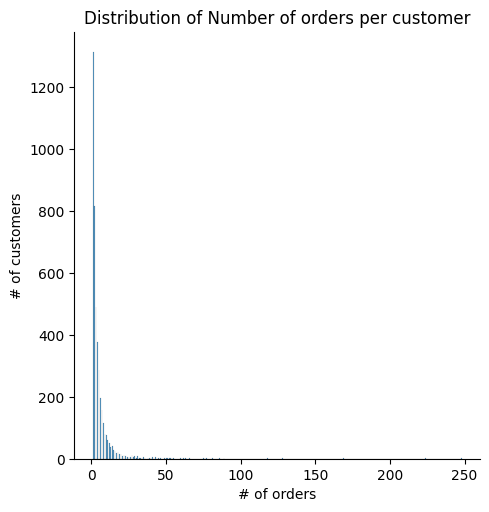

In [196]:
# we can create a sns plot to show the number of orders
import seaborn as sns
graph = sns.displot(data=n_orders)
graph.set(
    title= "Distribution of Number of orders per customer",
    xlabel= "# of orders",
    ylabel= "# of customers"
)

In [197]:
# step 1: we are going to keep only the relevant columns and drop duplicate values
df = data[['CustomerID','InvoiceNo','InvoiceDate']].drop_duplicates()
df

,CustomerID,InvoiceNo,InvoiceDate
0,17850.0,536365,2010-12-01 08:26:00
7,17850.0,536366,2010-12-01 08:28:00
9,13047.0,536367,2010-12-01 08:34:00
21,13047.0,536368,2010-12-01 08:34:00
25,13047.0,536369,2010-12-01 08:35:00
...,...,...,...
541865,13777.0,581583,2011-12-09 12:23:00
541867,13777.0,581584,2011-12-09 12:25:00
541869,15804.0,581585,2011-12-09 12:31:00
541890,13113.0,581586,2011-12-09 12:49:00


In [198]:
# step 2: we will create a cohort column, and order_month column.
df['Order_Month'] = df['InvoiceDate'].dt.to_period('M')
df.head(10)

,CustomerID,InvoiceNo,InvoiceDate,Order_Month
0,17850.0,536365,2010-12-01 08:26:00,2010-12
7,17850.0,536366,2010-12-01 08:28:00,2010-12
9,13047.0,536367,2010-12-01 08:34:00,2010-12
21,13047.0,536368,2010-12-01 08:34:00,2010-12
25,13047.0,536369,2010-12-01 08:35:00,2010-12
26,12583.0,536370,2010-12-01 08:45:00,2010-12
46,13748.0,536371,2010-12-01 09:00:00,2010-12
47,17850.0,536372,2010-12-01 09:01:00,2010-12
49,17850.0,536373,2010-12-01 09:02:00,2010-12
65,15100.0,536374,2010-12-01 09:09:00,2010-12


In [199]:
df['Cohort'] = data.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')
df.tail(100)

,CustomerID,InvoiceNo,InvoiceDate,Order_Month,Cohort
538599,14415.0,581412,2011-12-08 14:38:00,2011-12,2010-12
538714,16833.0,581413,2011-12-08 14:39:00,2011-12,2011-01
538729,14730.0,581414,2011-12-08 14:39:00,2011-12,2011-03
538800,13269.0,581415,2011-12-08 14:53:00,2011-12,2010-12
538812,14569.0,581416,2011-12-08 14:58:00,2011-12,2011-12
...,...,...,...,...,...
541865,13777.0,581583,2011-12-09 12:23:00,2011-12,2010-12
541867,13777.0,581584,2011-12-09 12:25:00,2011-12,2010-12
541869,15804.0,581585,2011-12-09 12:31:00,2011-12,2011-05
541890,13113.0,581586,2011-12-09 12:49:00,2011-12,2010-12


In [200]:
# then we can aggregate the data per cohort and order_month, so that we can arrange them uniquely
df_cohort = df.groupby(['Cohort', 'Order_Month']).agg(num_customers=('CustomerID','nunique')).reset_index(drop=False)
df_cohort
# .reset_index(drop=False) - it ensures both the origin grouping ('Cohort','Order_Month') and the newly placed column (num_customers) are retained as columns in the new dataframe named df_cohort
from operator import attrgetter # this is a function that extracts specific attributes from objects
df_cohort['period_number'] = (df_cohort.Order_Month - df_cohort.Cohort).apply(attrgetter('n'))
df_cohort

,Cohort,Order_Month,num_customers,period_number
0,2010-12,2010-12,948,0
1,2010-12,2011-01,362,1
2,2010-12,2011-02,317,2
3,2010-12,2011-03,367,3
4,2010-12,2011-04,341,4
...,...,...,...,...
86,2011-10,2011-11,93,1
87,2011-10,2011-12,46,2
88,2011-11,2011-11,321,0
89,2011-11,2011-12,43,1


In [201]:
#  from this analysis we can see that it doesnt take long for customers to order again after their previous order

In [202]:
# next step is to pivot_table the new DF in a way each row contains info about a given cohort and each column contains values for each period
cohort_pivot = df_cohort.pivot_table(index='Cohort',columns='period_number',values='num_customers')
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohort,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
# to obtain the retention matrix, we need to divide the values of each row's first value
cohort_size = cohort_pivot.iloc[:,0]
# iloc[] is used to access and manipulate data in tabular format, in this case our data is in form of pivot_table
cohort_size
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)*100
retention_matrix

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohort,,,,,,,,,,,,,
2010-12,100.0,38.185654,33.438819,38.713080,35.970464,39.662447,37.974684,35.443038,35.443038,39.451477,37.341772,50.000000,27.42616
2011-01,100.0,23.990499,28.266033,24.228029,32.779097,29.928741,26.128266,25.653207,31.116390,34.679335,36.817102,14.964371,NaN
2011-02,100.0,24.736842,19.210526,27.894737,26.842105,24.736842,25.526316,28.157895,25.789474,31.315789,9.210526,NaN,NaN
2011-03,100.0,19.090909,25.454545,21.818182,23.181818,17.727273,26.363636,23.863636,28.863636,8.863636,NaN,NaN,NaN
2011-04,100.0,22.742475,22.073579,21.070234,20.735786,23.745819,23.076923,26.086957,8.361204,NaN,NaN,NaN,NaN
2011-05,100.0,23.655914,17.204301,17.204301,21.505376,24.372760,26.523297,10.394265,NaN,NaN,NaN,NaN,NaN
2011-06,100.0,20.851064,18.723404,27.234043,24.680851,33.617021,10.212766,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,100.0,20.942408,20.418848,23.036649,27.225131,11.518325,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,100.0,25.149701,25.149701,25.149701,13.772455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


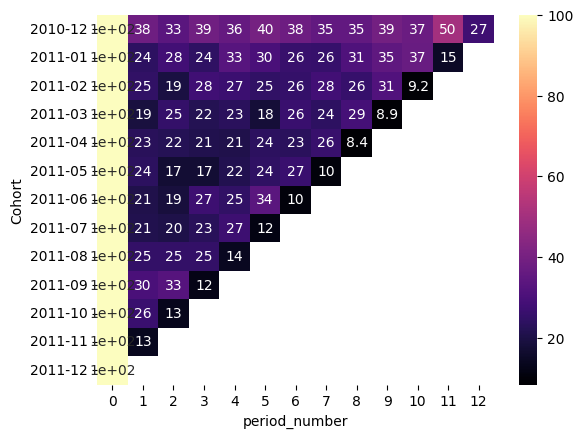

In [204]:
# we can see that there is a sharp drop-off in the second period ,on average around 80% of customers dont make purchase in the second period. A year after the first purchase, there is a drop of retention in customer purchasing
graph2 =sns.heatmap(data=retention_matrix, annot=True, cmap='magma')

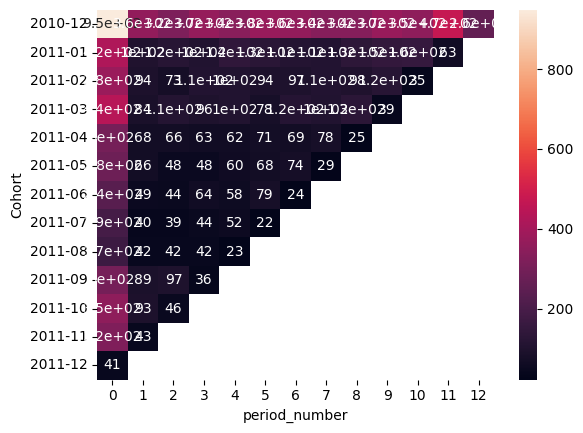

In [205]:
graph3 =sns.heatmap(data=cohort_pivot, annot=True)